In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.metrics import pairwise_distances_argmin_min 

pd.set_option('display.max_columns', 80)
pd.set_option('display.max_rows', 100)
pd.set_option('display.precision', 2)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### Variables de apoyo

In [ ]:
dictnumber = {"kidney":1, "hippocampus":2, "cerebellum":3, "colon":4, "liver":5,
             "endometrium":6, "placenta":7}

In [ ]:
def getname(x):
    res = x.split("_")
    return res[1]

#### Lectura de clases/etiquetas para efectos de evaluacion

In [ ]:
path = "/content/drive/MyDrive/UTEC - Maestría de Especialización en Computer Science/2do Ciclo 2022 - 2/CS8127 - Machine Learning/Proyectos/Proyecto 3 - Clustering/Dataset/"
dfclases = pd.read_csv(path + "clase.txt")

In [ ]:
dfclases.x.value_counts()

kidney         39
cerebellum     38
colon          34
hippocampus    31
liver          26
endometrium    15
placenta        6
Name: x, dtype: int64

In [ ]:
dfclases["concated_name"] = dfclases["Unnamed: 0"].astype(str) + "_" + dfclases["x"]
list_names = list(dfclases["concated_name"])

#### Lectura de dataset

In [ ]:
df = pd.read_csv(path + "dataset_tissue.txt")
df = df.iloc[:,1:]  

In [ ]:
df.columns = list_names

In [ ]:
df.head()

,1_kidney,2_kidney,3_kidney,4_kidney,5_kidney,6_kidney,7_kidney,8_kidney,9_kidney,10_kidney,11_kidney,12_kidney,13_kidney,14_kidney,15_kidney,16_kidney,17_hippocampus,18_hippocampus,19_hippocampus,20_hippocampus,21_hippocampus,22_hippocampus,23_hippocampus,24_hippocampus,25_hippocampus,26_hippocampus,27_hippocampus,28_hippocampus,29_hippocampus,30_hippocampus,31_hippocampus,32_hippocampus,33_hippocampus,34_hippocampus,35_hippocampus,36_hippocampus,37_hippocampus,38_hippocampus,39_hippocampus,40_hippocampus,...,150_endometrium,151_endometrium,152_endometrium,153_endometrium,154_endometrium,155_endometrium,156_endometrium,157_endometrium,158_endometrium,159_endometrium,160_endometrium,161_endometrium,162_endometrium,163_endometrium,164_liver,165_liver,166_liver,167_liver,168_liver,169_liver,170_liver,171_liver,172_liver,173_liver,174_liver,175_liver,176_cerebellum,177_cerebellum,178_cerebellum,179_cerebellum,180_cerebellum,181_cerebellum,182_cerebellum,183_cerebellum,184_placenta,185_placenta,186_placenta,187_placenta,188_placenta,189_placenta
0,10.19,10.51,10.27,10.25,10.16,9.97,9.84,9.95,9.91,10.17,9.46,10.13,10.47,9.97,10.51,9.95,11.17,10.92,11.07,11.16,11.39,10.89,11.67,11.22,11.90,11.40,10.96,10.36,10.77,10.27,10.76,11.37,10.91,10.57,11.23,11.24,11.58,11.44,11.01,10.64,...,9.74,10.63,10.19,10.51,10.16,10.01,10.34,9.43,9.73,9.51,9.49,9.67,9.48,9.65,8.43,8.36,8.75,8.28,8.43,8.75,8.28,8.36,8.60,8.71,8.71,8.60,11.92,11.92,11.75,11.81,11.80,10.04,11.29,9.89,9.66,9.80,10.51,9.98,9.94,10.31
1,6.04,6.70,6.14,6.58,6.61,6.06,6.19,5.93,6.34,6.05,6.28,5.88,6.20,5.99,6.45,6.16,5.85,5.66,5.79,5.83,5.92,5.65,5.79,5.71,5.68,5.68,5.78,5.66,5.79,5.71,5.98,5.74,5.85,5.84,5.82,5.77,5.87,5.99,5.75,5.61,...,6.07,6.11,6.11,6.19,6.30,5.98,6.12,6.22,5.89,5.97,6.05,5.85,6.11,6.16,5.85,6.07,6.00,6.16,5.85,6.00,6.16,6.07,6.05,6.21,6.13,6.10,6.42,6.06,6.19,6.36,6.16,6.22,6.17,6.21,6.27,6.06,6.35,6.72,6.84,7.03
2,7.45,7.78,7.70,8.48,8.12,7.64,8.01,7.85,7.98,7.54,8.57,7.68,7.70,7.62,8.47,7.49,7.45,7.39,8.16,11.77,7.96,7.97,7.67,7.20,7.47,7.93,7.49,7.33,7.36,7.18,8.53,7.44,9.21,7.26,7.56,7.55,7.52,7.36,7.51,7.63,...,7.65,7.40,8.33,7.64,7.44,7.45,7.62,7.75,7.39,7.66,7.31,7.51,8.71,7.51,8.79,8.89,8.89,7.44,8.79,8.89,7.44,8.89,8.65,8.09,8.29,8.59,7.47,7.41,7.45,7.24,7.73,7.57,7.32,7.23,7.33,7.49,7.47,7.12,7.13,7.41
3,12.03,12.01,11.63,11.08,10.83,11.71,11.71,11.75,10.71,11.76,10.72,11.66,11.66,11.44,10.96,11.55,10.62,10.99,11.15,10.60,11.11,10.93,11.01,10.72,10.80,11.03,10.69,10.50,10.52,10.38,10.55,10.73,10.67,10.70,11.00,10.86,10.74,10.68,11.12,10.57,...,10.69,12.12,11.79,11.81,11.27,11.67,12.16,10.74,10.67,10.84,10.44,10.82,10.86,10.81,10.41,10.45,10.47,10.08,10.41,10.47,10.08,10.45,10.42,10.26,10.55,10.25,10.43,10.37,10.17,10.35,10.44,10.57,10.25,10.19,9.70,9.91,9.91,9.41,9.59,9.79
4,5.27,5.18,5.30,5.37,5.33,5.25,5.23,5.16,5.24,5.41,5.34,5.10,5.26,5.38,5.32,5.24,5.27,5.50,5.33,5.20,4.96,5.23,5.34,5.45,5.26,5.33,5.24,6.09,6.87,7.22,5.28,5.53,5.93,6.00,5.46,5.39,5.33,5.59,5.25,5.26,...,5.14,5.08,5.09,5.10,5.10,5.01,5.20,5.01,5.08,5.25,5.02,5.18,5.13,5.29,5.24,5.31,5.27,5.26,5.24,5.27,5.26,5.31,5.02,5.31,5.12,5.28,5.34,5.34,5.34,5.36,5.26,5.05,5.06,5.19,5.16,5.31,5.34,4.90,5.30,5.21


In [ ]:
dft = df.T
dft.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,22175,22176,22177,22178,22179,22180,22181,22182,22183,22184,22185,22186,22187,22188,22189,22190,22191,22192,22193,22194,22195,22196,22197,22198,22199,22200,22201,22202,22203,22204,22205,22206,22207,22208,22209,22210,22211,22212,22213,22214
1_kidney,10.19,6.04,7.45,12.03,5.27,8.54,6.92,5.72,8.08,5.43,7.04,8.85,7.60,11.25,10.29,8.89,6.37,5.58,10.14,5.96,9.74,11.05,12.28,12.85,12.30,11.34,12.00,12.27,7.61,11.54,12.26,10.40,13.23,12.69,10.90,11.94,13.03,12.64,13.09,12.72,...,5.38,6.24,8.61,9.02,8.27,7.32,8.79,6.54,10.56,6.88,9.97,8.02,5.36,9.03,8.11,4.55,10.00,10.68,6.89,7.39,7.77,8.96,6.65,7.94,8.41,4.86,8.53,8.15,7.46,9.82,8.11,5.25,7.10,8.21,7.74,6.43,5.70,9.21,8.34,7.37
2_kidney,10.51,6.70,7.78,12.01,5.18,8.59,6.96,5.60,7.57,5.28,7.05,8.50,7.47,10.86,10.45,9.66,6.50,5.49,10.26,6.53,10.19,11.95,12.78,13.39,12.05,10.99,11.79,11.63,9.37,11.74,12.50,10.38,13.02,12.98,10.83,11.76,12.79,12.48,13.03,12.35,...,5.36,6.42,8.05,9.15,8.17,8.04,8.90,6.46,11.01,6.97,10.18,9.21,5.36,8.99,8.55,4.74,10.15,10.65,7.07,7.14,7.99,8.69,6.76,8.24,8.80,5.01,9.23,8.15,7.93,10.18,8.07,5.41,6.91,8.32,8.19,7.68,6.57,9.42,8.21,7.92


In [ ]:
dftarray = dft.values

In [ ]:
from sklearn.cluster import KMeans
import numpy as np

kmeans = KMeans(n_clusters=7, random_state=0).fit(dftarray)
results = kmeans.labels_

In [ ]:
dft["labels"] = list(results)

In [ ]:
dft

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,22181,22182,22183,22184,22185,22186,22187,22188,22189,22190,22191,22192,22193,22194,22195,22196,22197,22198,22199,22200,22201,22202,22203,22204,22205,22206,22207,22208,22209,22210,22211,22212,22213,22214,original,rawlabel,label,label_final,label_pred,labels
1_kidney,10.19,6.04,7.45,12.03,5.27,8.54,6.92,5.72,8.08,5.43,7.04,8.85,7.60,11.25,10.29,8.89,6.37,5.58,10.14,5.96,9.74,11.05,12.28,12.85,12.30,11.34,12.00,12.27,7.61,11.54,12.26,10.40,13.23,12.69,10.90,11.94,13.03,12.64,13.09,12.72,...,8.79,6.54,10.56,6.88,9.97,8.02,5.36,9.03,8.11,4.55,10.00,10.68,6.89,7.39,7.77,8.96,6.65,7.94,8.41,4.86,8.53,8.15,7.46,9.82,8.11,5.25,7.10,8.21,7.74,6.43,5.70,9.21,8.34,7.37,1_kidney,1_kidney,kidney,kidney,kidney,4
2_kidney,10.51,6.70,7.78,12.01,5.18,8.59,6.96,5.60,7.57,5.28,7.05,8.50,7.47,10.86,10.45,9.66,6.50,5.49,10.26,6.53,10.19,11.95,12.78,13.39,12.05,10.99,11.79,11.63,9.37,11.74,12.50,10.38,13.02,12.98,10.83,11.76,12.79,12.48,13.03,12.35,...,8.90,6.46,11.01,6.97,10.18,9.21,5.36,8.99,8.55,4.74,10.15,10.65,7.07,7.14,7.99,8.69,6.76,8.24,8.80,5.01,9.23,8.15,7.93,10.18,8.07,5.41,6.91,8.32,8.19,7.68,6.57,9.42,8.21,7.92,2_kidney,2_kidney,kidney,kidney,kidney,4
3_kidney,10.27,6.14,7.70,11.63,5.30,8.28,7.05,5.58,7.14,5.28,7.33,9.29,7.87,11.03,10.45,8.63,6.42,5.62,10.67,6.78,10.01,11.63,12.15,12.20,12.21,10.62,11.91,12.36,9.62,11.51,12.29,10.38,13.25,12.52,10.51,11.28,12.90,12.67,12.94,12.21,...,9.25,6.33,10.93,6.50,10.22,8.03,5.29,9.28,6.75,4.61,10.38,10.80,7.20,7.39,7.48,8.67,6.31,7.49,7.91,5.08,9.19,8.55,8.18,10.26,7.81,5.30,6.72,8.40,7.96,6.42,5.64,8.19,8.46,7.60,3_kidney,3_kidney,kidney,kidney,kidney,4
4_kidney,10.25,6.58,8.48,11.08,5.37,8.60,7.12,5.86,8.61,5.38,7.57,9.02,7.89,11.24,10.46,10.02,6.74,5.53,10.46,6.39,10.34,11.32,12.79,12.87,12.01,11.03,11.57,12.30,9.99,11.89,12.64,9.77,13.40,12.85,11.02,11.75,13.03,12.64,13.16,12.88,...,9.57,6.12,11.06,6.25,10.31,8.51,5.40,9.49,6.80,4.65,10.80,11.07,7.89,7.29,7.92,9.30,6.26,7.75,8.99,5.03,9.22,9.17,9.62,10.01,8.04,6.03,6.72,8.80,8.33,6.35,5.75,8.52,8.56,7.80,4_kidney,4_kidney,kidney,kidney,kidney,4
5_kidney,10.16,6.61,8.12,10.83,5.33,8.30,7.08,5.73,8.97,5.48,7.26,8.86,7.79,10.97,10.26,9.63,6.63,5.44,10.25,6.33,9.83,11.19,12.69,12.65,11.97,10.99,11.75,12.06,9.07,11.89,12.72,10.00,13.47,12.96,10.93,11.46,12.99,12.60,13.20,12.73,...,9.03,6.43,10.94,6.45,9.97,8.02,5.33,9.30,6.84,4.57,10.54,10.96,7.73,7.07,7.78,8.96,6.44,7.83,8.71,4.97,8.96,8.32,9.43,9.95,8.21,5.61,6.58,8.58,8.06,6.44,6.05,7.97,8.42,7.54,5_kidney,5_kidney,kidney,kidney,kidney,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185_placenta,9.80,6.06,7.49,9.91,5.31,7.42,6.91,5.78,6.55,5.44,6.91,8.26,7.53,9.44,10.13,8.61,6.19,5.22,9.54,5.46,9.05,9.25,12.28,11.61,12.73,11.20,11.82,12.02,10.77,12.19,12.66,10.02,13.10,12.62,11.37,11.82,12.97,12.36,13.21,12.22,...,8.95,6.32,10.77,6.32,9.52,7.00,5.45,9.20,5.81,4.57,9.75,10.40,7.11,7.05,7.74,8.96,6.52,8.18,5.95,5.22,8.70,8.28,6.92,9.87,7.10,5.36,7.10,7.97,6.79,6.22,7.33,8.45,8.34,7.66,185_placenta,185_placenta,placenta,placenta,placenta,5
186_placenta,10.51,6.35,7.47,9.91,5.34,7.90,6.98,6.00,6.78,5.37,9.38,9.22,7.64,9.84,11.68,8.66,6.80,5.37,10.26,6.91,10.32,11.29,12.17,12.35,12.60,10.81,11.28,11.87,10.45,11.74,12.32,10.85,12.98,12.15,10.86,11.40,12.83,12.32,13.13,11.75,...,8.59,6.15,11.03,6.24,9.85,8.76,5.43,9.17,6.19,4.60,10.00,10.64,7.18,6.90,7.83,9.09,6.65,7.47,5.87,5.02,8.74,8.72,6.93,10.42,7.06,5.43,7.05,7.16,7.92,6.42,10.26,9.30,8.26,8.07,186_placenta,186_placenta,placenta,placenta,placenta,5
187_placenta,9.98,6.72,7.12,9.41,4.90,8.12,6.81,5.97,6.58,5.42,10.23,9.57,7.52,9.37,9.91,8.89,6.75,5.78,9.9

In [ ]:
dft["original"] = dft.index

In [ ]:
dft

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,22181,22182,22183,22184,22185,22186,22187,22188,22189,22190,22191,22192,22193,22194,22195,22196,22197,22198,22199,22200,22201,22202,22203,22204,22205,22206,22207,22208,22209,22210,22211,22212,22213,22214,original,rawlabel,label,label_final,label_pred,labels
1_kidney,10.19,6.04,7.45,12.03,5.27,8.54,6.92,5.72,8.08,5.43,7.04,8.85,7.60,11.25,10.29,8.89,6.37,5.58,10.14,5.96,9.74,11.05,12.28,12.85,12.30,11.34,12.00,12.27,7.61,11.54,12.26,10.40,13.23,12.69,10.90,11.94,13.03,12.64,13.09,12.72,...,8.79,6.54,10.56,6.88,9.97,8.02,5.36,9.03,8.11,4.55,10.00,10.68,6.89,7.39,7.77,8.96,6.65,7.94,8.41,4.86,8.53,8.15,7.46,9.82,8.11,5.25,7.10,8.21,7.74,6.43,5.70,9.21,8.34,7.37,1_kidney,1_kidney,kidney,kidney,kidney,4
2_kidney,10.51,6.70,7.78,12.01,5.18,8.59,6.96,5.60,7.57,5.28,7.05,8.50,7.47,10.86,10.45,9.66,6.50,5.49,10.26,6.53,10.19,11.95,12.78,13.39,12.05,10.99,11.79,11.63,9.37,11.74,12.50,10.38,13.02,12.98,10.83,11.76,12.79,12.48,13.03,12.35,...,8.90,6.46,11.01,6.97,10.18,9.21,5.36,8.99,8.55,4.74,10.15,10.65,7.07,7.14,7.99,8.69,6.76,8.24,8.80,5.01,9.23,8.15,7.93,10.18,8.07,5.41,6.91,8.32,8.19,7.68,6.57,9.42,8.21,7.92,2_kidney,2_kidney,kidney,kidney,kidney,4
3_kidney,10.27,6.14,7.70,11.63,5.30,8.28,7.05,5.58,7.14,5.28,7.33,9.29,7.87,11.03,10.45,8.63,6.42,5.62,10.67,6.78,10.01,11.63,12.15,12.20,12.21,10.62,11.91,12.36,9.62,11.51,12.29,10.38,13.25,12.52,10.51,11.28,12.90,12.67,12.94,12.21,...,9.25,6.33,10.93,6.50,10.22,8.03,5.29,9.28,6.75,4.61,10.38,10.80,7.20,7.39,7.48,8.67,6.31,7.49,7.91,5.08,9.19,8.55,8.18,10.26,7.81,5.30,6.72,8.40,7.96,6.42,5.64,8.19,8.46,7.60,3_kidney,3_kidney,kidney,kidney,kidney,4
4_kidney,10.25,6.58,8.48,11.08,5.37,8.60,7.12,5.86,8.61,5.38,7.57,9.02,7.89,11.24,10.46,10.02,6.74,5.53,10.46,6.39,10.34,11.32,12.79,12.87,12.01,11.03,11.57,12.30,9.99,11.89,12.64,9.77,13.40,12.85,11.02,11.75,13.03,12.64,13.16,12.88,...,9.57,6.12,11.06,6.25,10.31,8.51,5.40,9.49,6.80,4.65,10.80,11.07,7.89,7.29,7.92,9.30,6.26,7.75,8.99,5.03,9.22,9.17,9.62,10.01,8.04,6.03,6.72,8.80,8.33,6.35,5.75,8.52,8.56,7.80,4_kidney,4_kidney,kidney,kidney,kidney,4
5_kidney,10.16,6.61,8.12,10.83,5.33,8.30,7.08,5.73,8.97,5.48,7.26,8.86,7.79,10.97,10.26,9.63,6.63,5.44,10.25,6.33,9.83,11.19,12.69,12.65,11.97,10.99,11.75,12.06,9.07,11.89,12.72,10.00,13.47,12.96,10.93,11.46,12.99,12.60,13.20,12.73,...,9.03,6.43,10.94,6.45,9.97,8.02,5.33,9.30,6.84,4.57,10.54,10.96,7.73,7.07,7.78,8.96,6.44,7.83,8.71,4.97,8.96,8.32,9.43,9.95,8.21,5.61,6.58,8.58,8.06,6.44,6.05,7.97,8.42,7.54,5_kidney,5_kidney,kidney,kidney,kidney,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185_placenta,9.80,6.06,7.49,9.91,5.31,7.42,6.91,5.78,6.55,5.44,6.91,8.26,7.53,9.44,10.13,8.61,6.19,5.22,9.54,5.46,9.05,9.25,12.28,11.61,12.73,11.20,11.82,12.02,10.77,12.19,12.66,10.02,13.10,12.62,11.37,11.82,12.97,12.36,13.21,12.22,...,8.95,6.32,10.77,6.32,9.52,7.00,5.45,9.20,5.81,4.57,9.75,10.40,7.11,7.05,7.74,8.96,6.52,8.18,5.95,5.22,8.70,8.28,6.92,9.87,7.10,5.36,7.10,7.97,6.79,6.22,7.33,8.45,8.34,7.66,185_placenta,185_placenta,placenta,placenta,placenta,5
186_placenta,10.51,6.35,7.47,9.91,5.34,7.90,6.98,6.00,6.78,5.37,9.38,9.22,7.64,9.84,11.68,8.66,6.80,5.37,10.26,6.91,10.32,11.29,12.17,12.35,12.60,10.81,11.28,11.87,10.45,11.74,12.32,10.85,12.98,12.15,10.86,11.40,12.83,12.32,13.13,11.75,...,8.59,6.15,11.03,6.24,9.85,8.76,5.43,9.17,6.19,4.60,10.00,10.64,7.18,6.90,7.83,9.09,6.65,7.47,5.87,5.02,8.74,8.72,6.93,10.42,7.06,5.43,7.05,7.16,7.92,6.42,10.26,9.30,8.26,8.07,186_placenta,186_placenta,placenta,placenta,placenta,5
187_placenta,9.98,6.72,7.12,9.41,4.90,8.12,6.81,5.97,6.58,5.42,10.23,9.57,7.52,9.37,9.91,8.89,6.75,5.78,9.9

In [ ]:
def getname(x):
    res = x.split("_")
    return res[1]

In [ ]:
dft["rawlabel"] = dft.index
dft["label"] = dft["rawlabel"].apply(lambda x:getname(x))
dft.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,22181,22182,22183,22184,22185,22186,22187,22188,22189,22190,22191,22192,22193,22194,22195,22196,22197,22198,22199,22200,22201,22202,22203,22204,22205,22206,22207,22208,22209,22210,22211,22212,22213,22214,original,rawlabel,label,label_final,label_pred,labels
1_kidney,10.19,6.04,7.45,12.03,5.27,8.54,6.92,5.72,8.08,5.43,7.04,8.85,7.60,11.25,10.29,8.89,6.37,5.58,10.14,5.96,9.74,11.05,12.28,12.85,12.30,11.34,12.00,12.27,7.61,11.54,12.26,10.40,13.23,12.69,10.90,11.94,13.03,12.64,13.09,12.72,...,8.79,6.54,10.56,6.88,9.97,8.02,5.36,9.03,8.11,4.55,10.00,10.68,6.89,7.39,7.77,8.96,6.65,7.94,8.41,4.86,8.53,8.15,7.46,9.82,8.11,5.25,7.10,8.21,7.74,6.43,5.70,9.21,8.34,7.37,1_kidney,1_kidney,kidney,kidney,kidney,4
2_kidney,10.51,6.70,7.78,12.01,5.18,8.59,6.96,5.60,7.57,5.28,7.05,8.50,7.47,10.86,10.45,9.66,6.50,5.49,10.26,6.53,10.19,11.95,12.78,13.39,12.05,10.99,11.79,11.63,9.37,11.74,12.50,10.38,13.02,12.98,10.83,11.76,12.79,12.48,13.03,12.35,...,8.90,6.46,11.01,6.97,10.18,9.21,5.36,8.99,8.55,4.74,10.15,10.65,7.07,7.14,7.99,8.69,6.76,8.24,8.80,5.01,9.23,8.15,7.93,10.18,8.07,5.41,6.91,8.32,8.19,7.68,6.57,9.42,8.21,7.92,2_kidney,2_kidney,kidney,kidney,kidney,4
3_kidney,10.27,6.14,7.70,11.63,5.30,8.28,7.05,5.58,7.14,5.28,7.33,9.29,7.87,11.03,10.45,8.63,6.42,5.62,10.67,6.78,10.01,11.63,12.15,12.20,12.21,10.62,11.91,12.36,9.62,11.51,12.29,10.38,13.25,12.52,10.51,11.28,12.90,12.67,12.94,12.21,...,9.25,6.33,10.93,6.50,10.22,8.03,5.29,9.28,6.75,4.61,10.38,10.80,7.20,7.39,7.48,8.67,6.31,7.49,7.91,5.08,9.19,8.55,8.18,10.26,7.81,5.30,6.72,8.40,7.96,6.42,5.64,8.19,8.46,7.60,3_kidney,3_kidney,kidney,kidney,kidney,4
4_kidney,10.25,6.58,8.48,11.08,5.37,8.60,7.12,5.86,8.61,5.38,7.57,9.02,7.89,11.24,10.46,10.02,6.74,5.53,10.46,6.39,10.34,11.32,12.79,12.87,12.01,11.03,11.57,12.30,9.99,11.89,12.64,9.77,13.40,12.85,11.02,11.75,13.03,12.64,13.16,12.88,...,9.57,6.12,11.06,6.25,10.31,8.51,5.40,9.49,6.80,4.65,10.80,11.07,7.89,7.29,7.92,9.30,6.26,7.75,8.99,5.03,9.22,9.17,9.62,10.01,8.04,6.03,6.72,8.80,8.33,6.35,5.75,8.52,8.56,7.80,4_kidney,4_kidney,kidney,kidney,kidney,4
5_kidney,10.16,6.61,8.12,10.83,5.33,8.30,7.08,5.73,8.97,5.48,7.26,8.86,7.79,10.97,10.26,9.63,6.63,5.44,10.25,6.33,9.83,11.19,12.69,12.65,11.97,10.99,11.75,12.06,9.07,11.89,12.72,10.00,13.47,12.96,10.93,11.46,12.99,12.60,13.20,12.73,...,9.03,6.43,10.94,6.45,9.97,8.02,5.33,9.30,6.84,4.57,10.54,10.96,7.73,7.07,7.78,8.96,6.44,7.83,8.71,4.97,8.96,8.32,9.43,9.95,8.21,5.61,6.58,8.58,8.06,6.44,6.05,7.97,8.42,7.54,5_kidney,5_kidney,kidney,kidney,kidney,4


In [ ]:
dft["label_pred"] = dft["original"].apply(lambda x:getname(x))

In [ ]:
dft

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,22181,22182,22183,22184,22185,22186,22187,22188,22189,22190,22191,22192,22193,22194,22195,22196,22197,22198,22199,22200,22201,22202,22203,22204,22205,22206,22207,22208,22209,22210,22211,22212,22213,22214,original,rawlabel,label,label_final,label_pred,labels
1_kidney,10.19,6.04,7.45,12.03,5.27,8.54,6.92,5.72,8.08,5.43,7.04,8.85,7.60,11.25,10.29,8.89,6.37,5.58,10.14,5.96,9.74,11.05,12.28,12.85,12.30,11.34,12.00,12.27,7.61,11.54,12.26,10.40,13.23,12.69,10.90,11.94,13.03,12.64,13.09,12.72,...,8.79,6.54,10.56,6.88,9.97,8.02,5.36,9.03,8.11,4.55,10.00,10.68,6.89,7.39,7.77,8.96,6.65,7.94,8.41,4.86,8.53,8.15,7.46,9.82,8.11,5.25,7.10,8.21,7.74,6.43,5.70,9.21,8.34,7.37,1_kidney,1_kidney,kidney,kidney,kidney,4
2_kidney,10.51,6.70,7.78,12.01,5.18,8.59,6.96,5.60,7.57,5.28,7.05,8.50,7.47,10.86,10.45,9.66,6.50,5.49,10.26,6.53,10.19,11.95,12.78,13.39,12.05,10.99,11.79,11.63,9.37,11.74,12.50,10.38,13.02,12.98,10.83,11.76,12.79,12.48,13.03,12.35,...,8.90,6.46,11.01,6.97,10.18,9.21,5.36,8.99,8.55,4.74,10.15,10.65,7.07,7.14,7.99,8.69,6.76,8.24,8.80,5.01,9.23,8.15,7.93,10.18,8.07,5.41,6.91,8.32,8.19,7.68,6.57,9.42,8.21,7.92,2_kidney,2_kidney,kidney,kidney,kidney,4
3_kidney,10.27,6.14,7.70,11.63,5.30,8.28,7.05,5.58,7.14,5.28,7.33,9.29,7.87,11.03,10.45,8.63,6.42,5.62,10.67,6.78,10.01,11.63,12.15,12.20,12.21,10.62,11.91,12.36,9.62,11.51,12.29,10.38,13.25,12.52,10.51,11.28,12.90,12.67,12.94,12.21,...,9.25,6.33,10.93,6.50,10.22,8.03,5.29,9.28,6.75,4.61,10.38,10.80,7.20,7.39,7.48,8.67,6.31,7.49,7.91,5.08,9.19,8.55,8.18,10.26,7.81,5.30,6.72,8.40,7.96,6.42,5.64,8.19,8.46,7.60,3_kidney,3_kidney,kidney,kidney,kidney,4
4_kidney,10.25,6.58,8.48,11.08,5.37,8.60,7.12,5.86,8.61,5.38,7.57,9.02,7.89,11.24,10.46,10.02,6.74,5.53,10.46,6.39,10.34,11.32,12.79,12.87,12.01,11.03,11.57,12.30,9.99,11.89,12.64,9.77,13.40,12.85,11.02,11.75,13.03,12.64,13.16,12.88,...,9.57,6.12,11.06,6.25,10.31,8.51,5.40,9.49,6.80,4.65,10.80,11.07,7.89,7.29,7.92,9.30,6.26,7.75,8.99,5.03,9.22,9.17,9.62,10.01,8.04,6.03,6.72,8.80,8.33,6.35,5.75,8.52,8.56,7.80,4_kidney,4_kidney,kidney,kidney,kidney,4
5_kidney,10.16,6.61,8.12,10.83,5.33,8.30,7.08,5.73,8.97,5.48,7.26,8.86,7.79,10.97,10.26,9.63,6.63,5.44,10.25,6.33,9.83,11.19,12.69,12.65,11.97,10.99,11.75,12.06,9.07,11.89,12.72,10.00,13.47,12.96,10.93,11.46,12.99,12.60,13.20,12.73,...,9.03,6.43,10.94,6.45,9.97,8.02,5.33,9.30,6.84,4.57,10.54,10.96,7.73,7.07,7.78,8.96,6.44,7.83,8.71,4.97,8.96,8.32,9.43,9.95,8.21,5.61,6.58,8.58,8.06,6.44,6.05,7.97,8.42,7.54,5_kidney,5_kidney,kidney,kidney,kidney,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185_placenta,9.80,6.06,7.49,9.91,5.31,7.42,6.91,5.78,6.55,5.44,6.91,8.26,7.53,9.44,10.13,8.61,6.19,5.22,9.54,5.46,9.05,9.25,12.28,11.61,12.73,11.20,11.82,12.02,10.77,12.19,12.66,10.02,13.10,12.62,11.37,11.82,12.97,12.36,13.21,12.22,...,8.95,6.32,10.77,6.32,9.52,7.00,5.45,9.20,5.81,4.57,9.75,10.40,7.11,7.05,7.74,8.96,6.52,8.18,5.95,5.22,8.70,8.28,6.92,9.87,7.10,5.36,7.10,7.97,6.79,6.22,7.33,8.45,8.34,7.66,185_placenta,185_placenta,placenta,placenta,placenta,5
186_placenta,10.51,6.35,7.47,9.91,5.34,7.90,6.98,6.00,6.78,5.37,9.38,9.22,7.64,9.84,11.68,8.66,6.80,5.37,10.26,6.91,10.32,11.29,12.17,12.35,12.60,10.81,11.28,11.87,10.45,11.74,12.32,10.85,12.98,12.15,10.86,11.40,12.83,12.32,13.13,11.75,...,8.59,6.15,11.03,6.24,9.85,8.76,5.43,9.17,6.19,4.60,10.00,10.64,7.18,6.90,7.83,9.09,6.65,7.47,5.87,5.02,8.74,8.72,6.93,10.42,7.06,5.43,7.05,7.16,7.92,6.42,10.26,9.30,8.26,8.07,186_placenta,186_placenta,placenta,placenta,placenta,5
187_placenta,9.98,6.72,7.12,9.41,4.90,8.12,6.81,5.97,6.58,5.42,10.23,9.57,7.52,9.37,9.91,8.89,6.75,5.78,9.9

In [ ]:
dft.loc[:,["labels","label_pred"]].groupby(["labels","label_pred"])["labels","label_pred"].count()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


labels  label_pred
labels label_pred                     
0      liver            26          26
1      endometrium      15          15
2      cerebellum        5           5
       hippocampus      31          31
3      colon            34          34
4      kidney           39          39
5      placenta          6           6
6      cerebellum       33          33

In [ ]:
dictPredLabel = {0: "liver", 1:"endometrium", 2: "hippocampus", 3:"colon", 4:"kidney",
             5:"placenta", 6:"cerebellum"}

In [ ]:
dft["predlabel_name"] = dft["labels"].map(dictPredLabel)

In [ ]:
dft.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,22182,22183,22184,22185,22186,22187,22188,22189,22190,22191,22192,22193,22194,22195,22196,22197,22198,22199,22200,22201,22202,22203,22204,22205,22206,22207,22208,22209,22210,22211,22212,22213,22214,original,rawlabel,label,label_final,label_pred,labels,predlabel_name
1_kidney,10.19,6.04,7.45,12.03,5.27,8.54,6.92,5.72,8.08,5.43,7.04,8.85,7.60,11.25,10.29,8.89,6.37,5.58,10.14,5.96,9.74,11.05,12.28,12.85,12.30,11.34,12.00,12.27,7.61,11.54,12.26,10.40,13.23,12.69,10.90,11.94,13.03,12.64,13.09,12.72,...,6.54,10.56,6.88,9.97,8.02,5.36,9.03,8.11,4.55,10.00,10.68,6.89,7.39,7.77,8.96,6.65,7.94,8.41,4.86,8.53,8.15,7.46,9.82,8.11,5.25,7.10,8.21,7.74,6.43,5.70,9.21,8.34,7.37,1_kidney,1_kidney,kidney,kidney,kidney,4,kidney
2_kidney,10.51,6.70,7.78,12.01,5.18,8.59,6.96,5.60,7.57,5.28,7.05,8.50,7.47,10.86,10.45,9.66,6.50,5.49,10.26,6.53,10.19,11.95,12.78,13.39,12.05,10.99,11.79,11.63,9.37,11.74,12.50,10.38,13.02,12.98,10.83,11.76,12.79,12.48,13.03,12.35,...,6.46,11.01,6.97,10.18,9.21,5.36,8.99,8.55,4.74,10.15,10.65,7.07,7.14,7.99,8.69,6.76,8.24,8.80,5.01,9.23,8.15,7.93,10.18,8.07,5.41,6.91,8.32,8.19,7.68,6.57,9.42,8.21,7.92,2_kidney,2_kidney,kidney,kidney,kidney,4,kidney
3_kidney,10.27,6.14,7.70,11.63,5.30,8.28,7.05,5.58,7.14,5.28,7.33,9.29,7.87,11.03,10.45,8.63,6.42,5.62,10.67,6.78,10.01,11.63,12.15,12.20,12.21,10.62,11.91,12.36,9.62,11.51,12.29,10.38,13.25,12.52,10.51,11.28,12.90,12.67,12.94,12.21,...,6.33,10.93,6.50,10.22,8.03,5.29,9.28,6.75,4.61,10.38,10.80,7.20,7.39,7.48,8.67,6.31,7.49,7.91,5.08,9.19,8.55,8.18,10.26,7.81,5.30,6.72,8.40,7.96,6.42,5.64,8.19,8.46,7.60,3_kidney,3_kidney,kidney,kidney,kidney,4,kidney
4_kidney,10.25,6.58,8.48,11.08,5.37,8.60,7.12,5.86,8.61,5.38,7.57,9.02,7.89,11.24,10.46,10.02,6.74,5.53,10.46,6.39,10.34,11.32,12.79,12.87,12.01,11.03,11.57,12.30,9.99,11.89,12.64,9.77,13.40,12.85,11.02,11.75,13.03,12.64,13.16,12.88,...,6.12,11.06,6.25,10.31,8.51,5.40,9.49,6.80,4.65,10.80,11.07,7.89,7.29,7.92,9.30,6.26,7.75,8.99,5.03,9.22,9.17,9.62,10.01,8.04,6.03,6.72,8.80,8.33,6.35,5.75,8.52,8.56,7.80,4_kidney,4_kidney,kidney,kidney,kidney,4,kidney
5_kidney,10.16,6.61,8.12,10.83,5.33,8.30,7.08,5.73,8.97,5.48,7.26,8.86,7.79,10.97,10.26,9.63,6.63,5.44,10.25,6.33,9.83,11.19,12.69,12.65,11.97,10.99,11.75,12.06,9.07,11.89,12.72,10.00,13.47,12.96,10.93,11.46,12.99,12.60,13.20,12.73,...,6.43,10.94,6.45,9.97,8.02,5.33,9.30,6.84,4.57,10.54,10.96,7.73,7.07,7.78,8.96,6.44,7.83,8.71,4.97,8.96,8.32,9.43,9.95,8.21,5.61,6.58,8.58,8.06,6.44,6.05,7.97,8.42,7.54,5_kidney,5_kidney,kidney,kidney,kidney,4,kidney


In [ ]:
dft.loc[:,["labels","label_final"]].drop_duplicates()

,labels,label_final
1_kidney,4,kidney
17_hippocampus,2,hippocampus
47_cerebellum,6,cerebellum
87_colon,3,colon
124_liver,0,liver
149_endometrium,1,endometrium
176_cerebellum,2,cerebellum
184_placenta,5,placenta


In [ ]:
results = kmeans.labels_

In [ ]:
dfres = pd.DataFrame(data = results, columns = ["valores"])
dfres["cua"] = 0
dfres

,valores,cua
0,4,0
1,4,0
2,4,0
3,4,0
4,4,0
...,...,...
184,5,0
185,5,0
186,5,0
187,5,0


In [ ]:
dfres.valores.value_counts()

4    39
2    36
3    34
6    33
0    26
1    15
5     6
Name: valores, dtype: int64

In [ ]:
dfclases.x.value_counts()

kidney         39
cerebellum     38
colon          34
hippocampus    31
liver          26
endometrium    15
placenta        6
Name: x, dtype: int64

In [ ]:
print("Homogeneity: %0.3f" % metrics.homogeneity_score(dft.label, dft.predlabel_name))
print("Completeness: %0.3f" % metrics.completeness_score(dft.label, dft.predlabel_name))

Homogeneity: 0.958
Completeness: 0.957


### Visualizando los clusters en 2-D usando  reducción  T-SNE

In [ ]:
from sklearn.manifold import TSNE

In [ ]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(dft.iloc[:,0:22215])

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 189 samples in 0.003s...
[t-SNE] Computed neighbors for 189 samples in 0.066s...
[t-SNE] Computed conditional probabilities for sample 189 / 189
[t-SNE] Mean sigma: 58.738997
[t-SNE] KL divergence after 250 iterations with early exaggeration: 52.168274
[t-SNE] KL divergence after 300 iterations: 0.125255


In [ ]:
dft['tsne-2d-one'] = tsne_results[:,0]
dft['tsne-2d-two'] = tsne_results[:,1]

In [ ]:
dft.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,22180,22181,22182,22183,22184,22185,22186,22187,22188,22189,22190,22191,22192,22193,22194,22195,22196,22197,22198,22199,22200,22201,22202,22203,22204,22205,22206,22207,22208,22209,22210,22211,22212,22213,22214,labels,original,label_final,tsne-2d-one,tsne-2d-two
1_kidney,10.19,6.04,7.45,12.03,5.27,8.54,6.92,5.72,8.08,5.43,7.04,8.85,7.60,11.25,10.29,8.89,6.37,5.58,10.14,5.96,9.74,11.05,12.28,12.85,12.30,11.34,12.00,12.27,7.61,11.54,12.26,10.40,13.23,12.69,10.90,11.94,13.03,12.64,13.09,12.72,...,7.32,8.79,6.54,10.56,6.88,9.97,8.02,5.36,9.03,8.11,4.55,10.00,10.68,6.89,7.39,7.77,8.96,6.65,7.94,8.41,4.86,8.53,8.15,7.46,9.82,8.11,5.25,7.10,8.21,7.74,6.43,5.70,9.21,8.34,7.37,4,1_kidney,kidney,0.19,-2.47
2_kidney,10.51,6.70,7.78,12.01,5.18,8.59,6.96,5.60,7.57,5.28,7.05,8.50,7.47,10.86,10.45,9.66,6.50,5.49,10.26,6.53,10.19,11.95,12.78,13.39,12.05,10.99,11.79,11.63,9.37,11.74,12.50,10.38,13.02,12.98,10.83,11.76,12.79,12.48,13.03,12.35,...,8.04,8.90,6.46,11.01,6.97,10.18,9.21,5.36,8.99,8.55,4.74,10.15,10.65,7.07,7.14,7.99,8.69,6.76,8.24,8.80,5.01,9.23,8.15,7.93,10.18,8.07,5.41,6.91,8.32,8.19,7.68,6.57,9.42,8.21,7.92,4,2_kidney,kidney,-0.95,-1.14


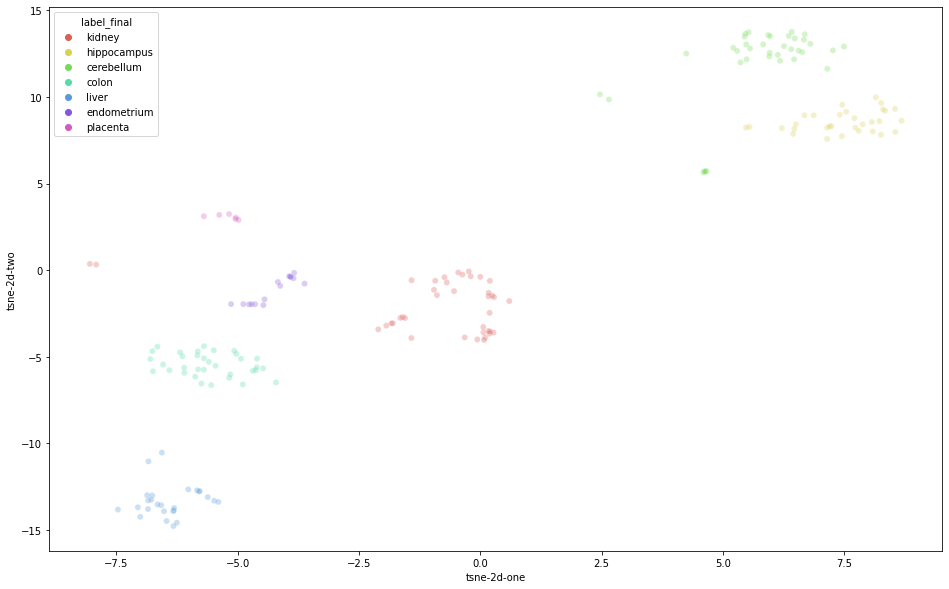

In [ ]:
import seaborn as sns

dftnse = dft.loc[:,["label_final","tsne-2d-one","tsne-2d-two"]]

dftnse = dftnse.loc[(dftnse["tsne-2d-one"]< 100)]
dftnse = dftnse.loc[(dftnse["tsne-2d-two"]< 100)]


plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="label_final",
    palette=sns.color_palette("hls", 7),
    #data=dftnse, #dft.loc[:,["predlabel_name","tsne-2d-one","tsne-2d-two"]],
    data=dft.loc[:,["label_final","tsne-2d-one","tsne-2d-two"]],
    legend="full",
    alpha=0.3
)